In [1]:
from ast import literal_eval
from pandas import DataFrame  # http://github.com/pydata/pandas
import pandas as pd
import re
import requests               # http://github.com/kennethreitz/requests
import subprocess
import sys
import json
import glob
from os import path
import itertools

In [2]:
from tools import load_nyt_database, word_freq

In [3]:
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
%matplotlib inline

In [4]:
nyt_norm = load_nyt_database()

In [5]:
markers = ['o', '*', '+', '.', ',']

In [6]:
def plot_both(words):
    marker = itertools.cycle(markers) 
    df1 = word_freq(words) 
    axis_1 = df1.plot(style = {w:"-{}".format(next(marker)) for w in words})
    axis_1.set_ylabel("Google Book Ngrams ($\%$)")
    axis_1.set_xlabel("Year")
    _ = axis_1.legend(loc='upper left', ncol=2)
    axis_1.ticklabel_format(style="sci")
    axis_1.grid(True)

    marker = itertools.cycle(markers) 
    axis_2 = axis_1.twinx()
    axis_2 = nyt_norm[words].plot(ax=axis_2, figsize=(14,6), style={w:"--{}".format(next(marker)) for w in words})
    axis_2.set_ylabel("New York Times ($\%$)")
    axis_2.ticklabel_format(style="sci")
    _ = axis_2.legend(loc='upper right', ncol=2)
# Change the style, Roxanne does not like pretty things!

(1930, 2015)

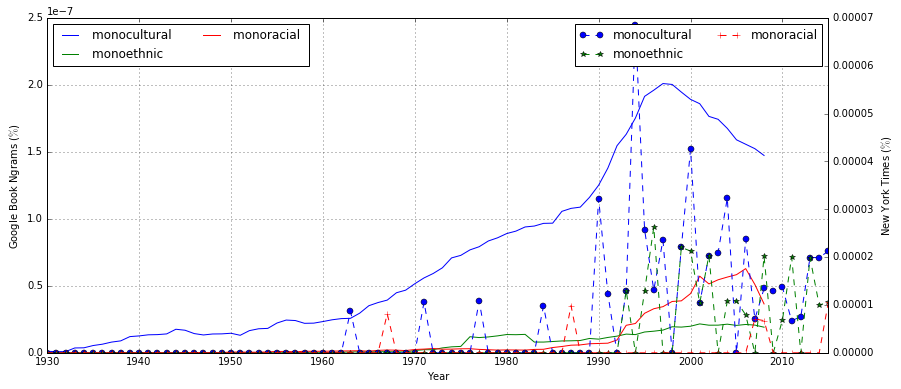

In [7]:
plot_both(['monocultural', 'monoethnic', 'monoracial']) 
plt.xlim(1930, 2015)

1. monoracial has no data from NYT. 
1. 1865, 1905, 1915 (monocultural) NYT

(1910, 2015)

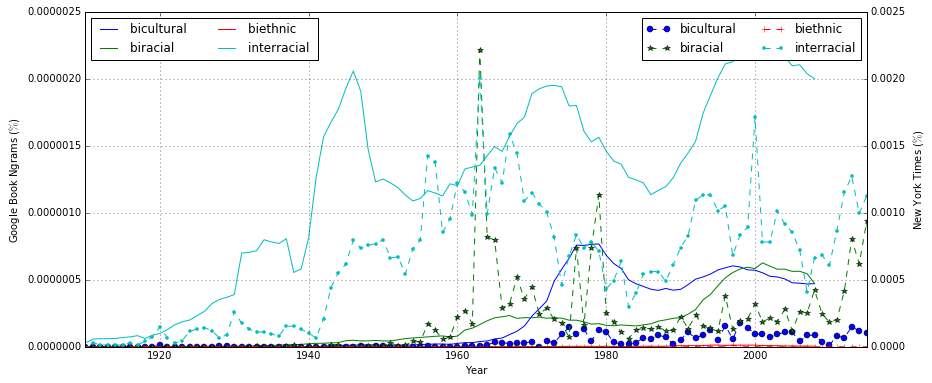

In [8]:
plot_both(['bicultural', 'biracial', 'biethnic', 'interracial'])
plt.xlim(1910, 2015)

1. biethnic has no frequency in NYT
1. 1865 (NYT biracial)

(1950, 2015)

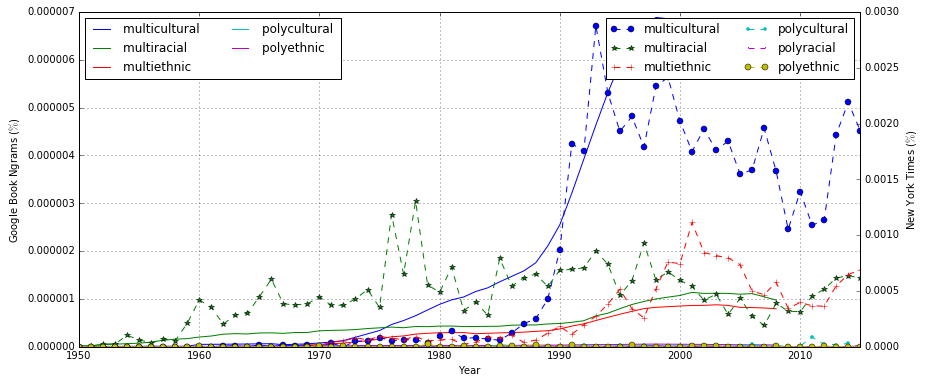

In [9]:
plot_both(['multicultural', 'multiracial', 'multiethnic', 'polycultural', 'polyracial', 'polyethnic'])
plt.xlim(1950, 2015)

1. polyracial and polyethnic have no frequencies in the NYT
1. No data before 1950

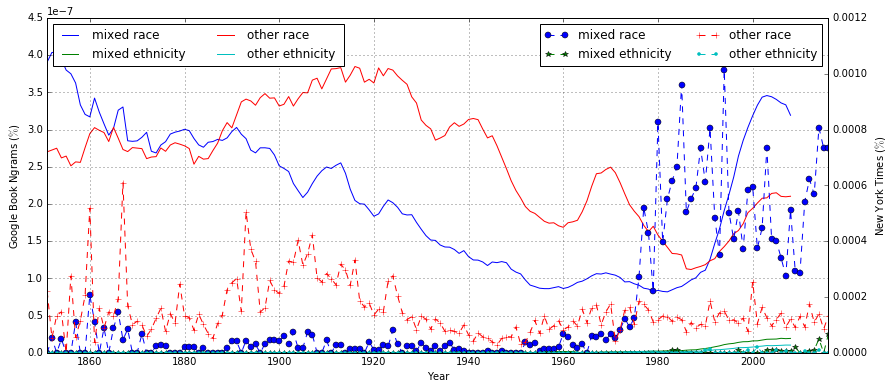

In [10]:
plot_both(['mixed race', 'mixed ethnicity', 'other race', 'other ethnicity'])

1. mixed ethnicity barely has a frequency in the present and other ethnicity has no frequency in the NYT
2. mixed results

(1940, 2015)

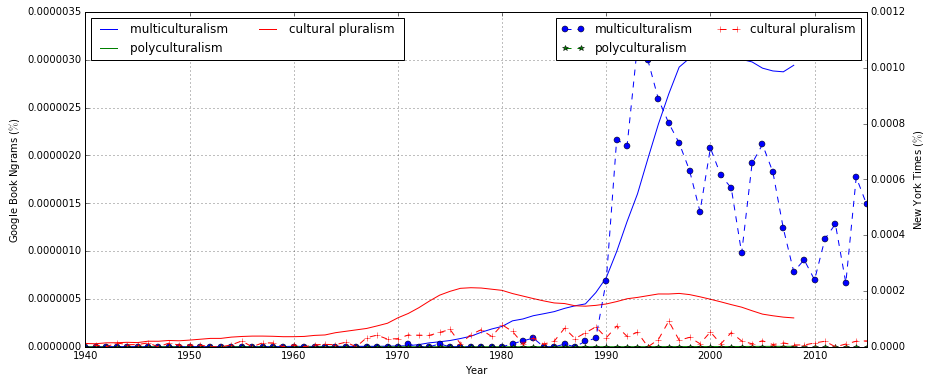

In [11]:
plot_both(['multiculturalism', 'polyculturalism', 'cultural pluralism'])
plt.xlim(1940, 2015)

1. polyculturalism has no frequency in NYT
1. 1865, 1905, 1915, 1925 (cultural pluralism) NYT

(1920, 2015)

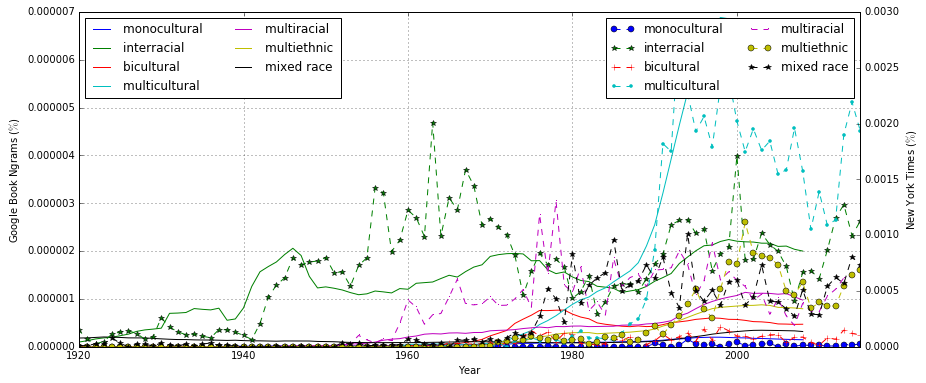

In [12]:
plot_both(['monocultural', 'interracial', 'bicultural', 'multicultural', 'multiracial', 'multiethnic', 'mixed race'])
plt.xlim(1920, 2015)

-Google Book N-Gram: mixed race: 1800 horizontal continuous trend (similar for NYT-- small peak in 1860)

# To Do

1. ~~Check if color is accepted in journals-- may need to switch format of figures (make black and white)~~
1. ~~Use shapes as points and dashed and solid lines to indicate NYT v. Google N-Grams(plot(x,y, ’*’))
s, *, d, h, +, x, p~~
1.~Change Key: Google N-Grams = dashed line, NYT = solid line, shapes for words
1. ~~Need to change word in first graph. --> monocultural and monoracial~~
1. ~~Present data from 1920 onwards and make note about trends previous to this point. ~~
1. Smoothen lines.?